In [30]:
# step 5

!pip install fredapi

import pandas as pd
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from fredapi import fred
import yfinance as yfin
import yfinance as yf

In [31]:
def analyze_scenario_data(scenario_name, fred_codes, api_key=None):
    """
    Analyze and visualize data for a specific financial scenario with multiple datasets.

    Parameters:
    - scenario_name (str): A description of the financial scenario.
    - fred_codes (list of str): List of FRED codes for the relevant datasets.
    - api_key (str, optional): The FRED API key (if required).

    Returns:
    - None (displays plots and insights).
    """
    # Define the start date as January 1, 2011
    start_date = datetime.date(2011, 1, 1)
    
    api_key = 'ce98731c794e3fd998a3b93a6b8cee5b'
    
    # Define the end date as the current date
    end_date = datetime.date.today()

    # Fetch the data from FRED using the API for each code
    data = {}
    for fred_code in fred_codes:
        data[fred_code] = web.DataReader(fred_code, "fred", start_date, end_date, api_key=api_key)

    # Display the first few rows of the data for each dataset
    for fred_code, dataset in data.items():
        print(f"{scenario_name} - {fred_code} Data:")
        print(dataset.head())

  # Exploratory Data Analysis (EDA) for each dataset
        # Determine whether to draw separate time series plots or a combined plot
    if "relationship" in scenario_name.lower() and len(fred_codes) == 2:
        # Combine datasets in a single time series plot with two y-labels
        plt.figure(figsize=(12, 6))
        for fred_code, dataset in data.items():
            if fred_code == fred_codes[0]:
                ax1 = plt.gca()
                plt.plot(dataset.index, dataset[fred_code], label=f"{scenario_name} - {fred_code}", color='blue')
                plt.ylabel(f"{scenario_name} - {fred_code} Data")
            elif fred_code == fred_codes[1]:
                ax2 = ax1.twinx()
                plt.plot(dataset.index, dataset[fred_code], label=f"{scenario_name} - {fred_code}", color='red')
                plt.ylabel(f"{scenario_name} - {fred_code} Data")
        plt.xlabel("Year")
        plt.title(f"{scenario_name} - Combined Data Over Time")
        lines, labels = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax2.legend(lines + lines2, labels + labels2, loc='upper left')
        plt.grid(True)
        plt.show()
    else:
        # Draw all three graphs for other scenarios
        for fred_code, dataset in data.items():
            plt.figure(figsize=(10, 6))

            # Plotting the data over time (time series plot)
            plt.figure(figsize=(10, 6))
            plt.plot(dataset.index, dataset[fred_code])
            plt.xlabel("Year")
            plt.ylabel(f"{scenario_name} - {fred_code} Data")
            plt.title(f"{scenario_name} - {fred_code} Data Over Time")
            plt.grid(True)

            # Distribution of the data (histogram)
            plt.figure(figsize=(10, 6))
            sns.histplot(data=dataset, x=fred_code, bins=20, kde=True)
            plt.xlabel(f"{scenario_name} - {fred_code} Data")
            plt.ylabel("Frequency")
            plt.title(f"Distribution of {scenario_name} - {fred_code} Data")

            # Scatterplot
            plt.figure(figsize=(10, 6))
            sns.scatterplot(data=dataset, x=dataset.index, y=fred_code)
            plt.xlabel("Year")
            plt.ylabel(f"{scenario_name} - {fred_code} Data")
            plt.title(f"Scatterplot: {scenario_name} - {fred_code} Data over Time")

            plt.tight_layout()
            plt.show()



Consumer Credit Analysis - REVOLSLAR Data:
            REVOLSLAR
DATE                 
2011-01-01      -5.27
2011-02-01      -2.40
2011-03-01       2.77
2011-04-01      -2.07
2011-05-01      -2.47


<Figure size 1000x600 with 0 Axes>

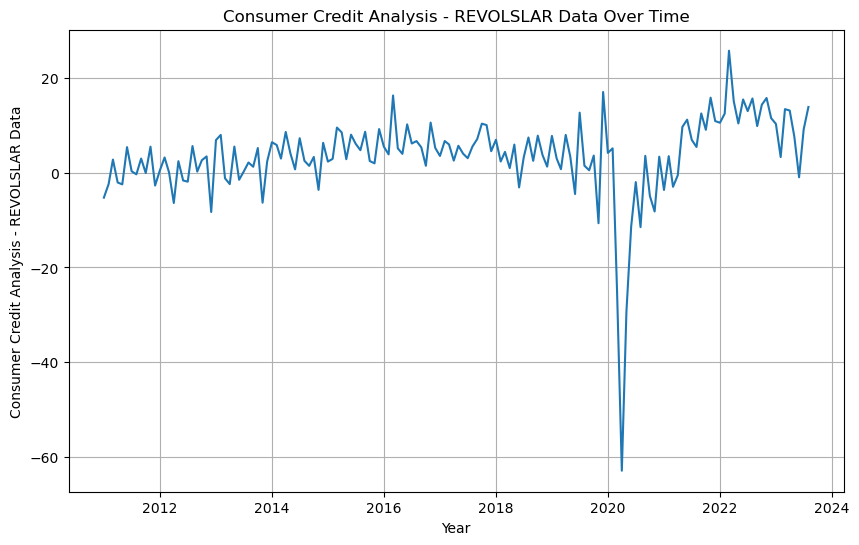

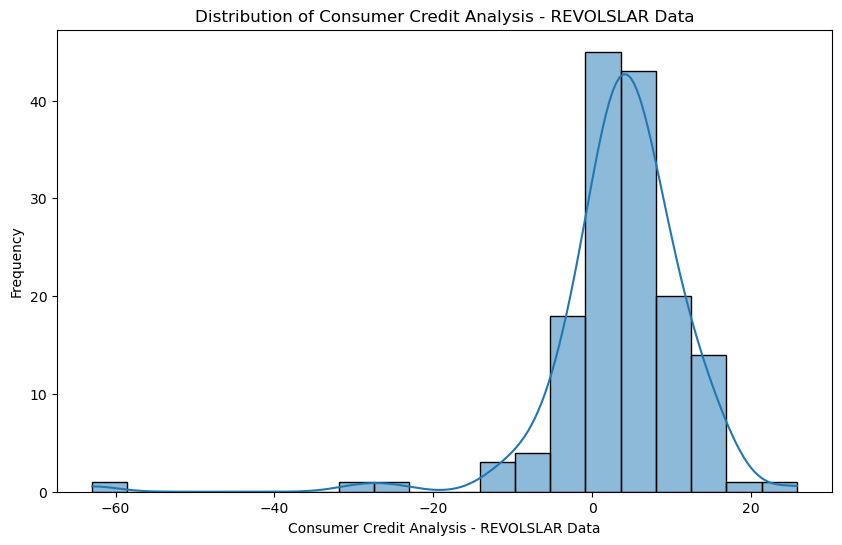

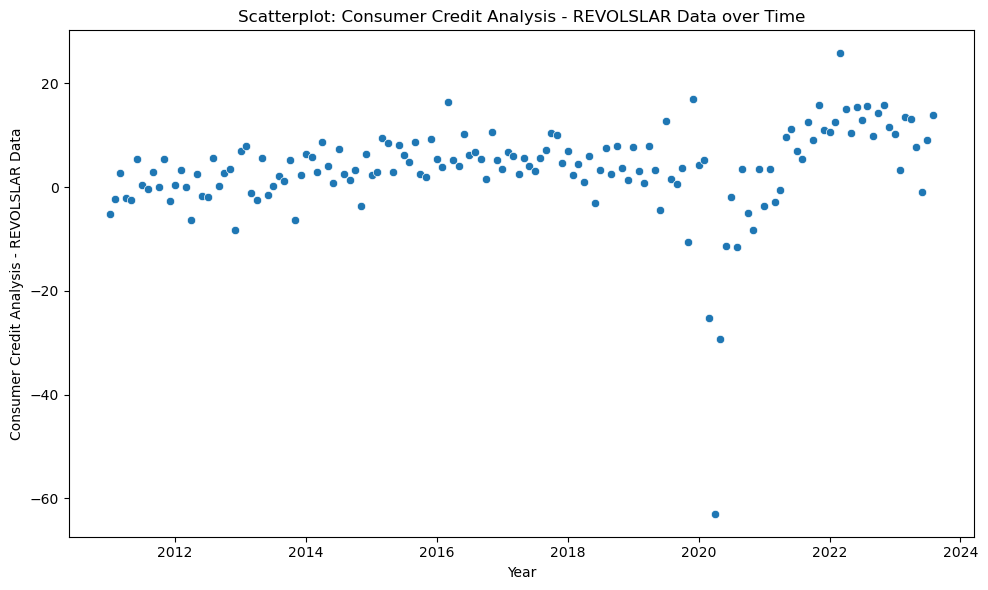

In [32]:
#  SCENARIO 1 

# This line plot shows an overall increasing trend in consumer credit analysis from 2011 to the present, indicating growing card debt.
# The histogram highlights that the distribution of consumer credit analysis is right skewed, with most values concentrating on the lower end
# The scatter plot illustrates the upward trend in consumer credit analysis over time, suggesting an increase in consumer credit card usage

analyze_scenario_data(scenario_name='Consumer Credit Analysis', fred_codes=['REVOLSLAR'])

Scenario 3: Construction Loan Analysis - TTLCONS Data:
             TTLCONS
DATE                
2011-01-01  759964.0
2011-02-01  758376.0
2011-03-01  769157.0
2011-04-01  769437.0
2011-05-01  775251.0


<Figure size 1000x600 with 0 Axes>

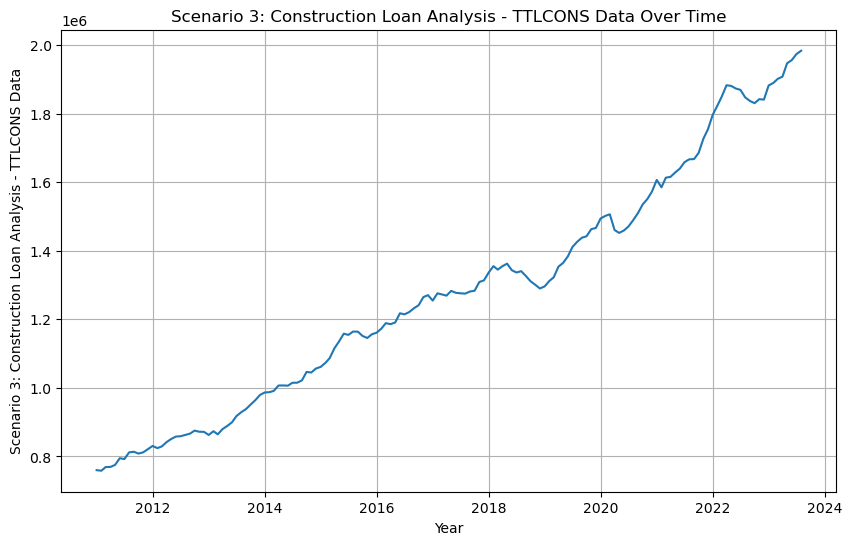

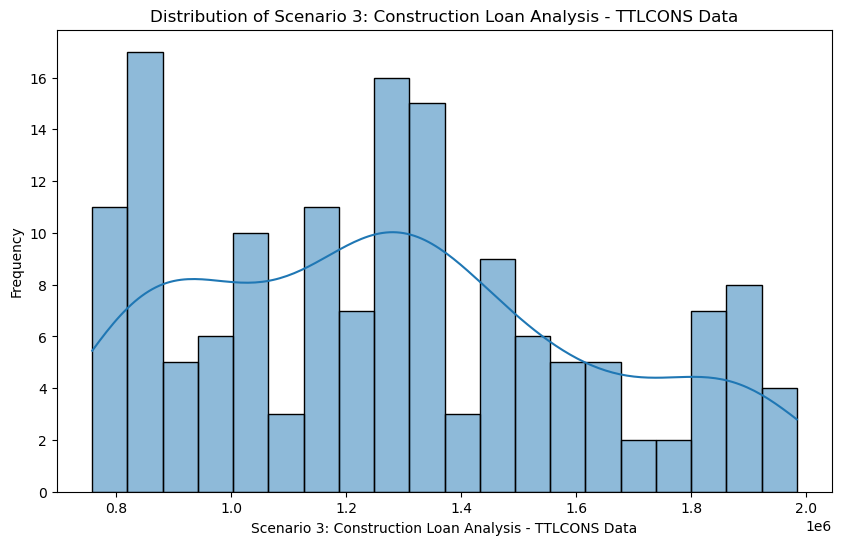

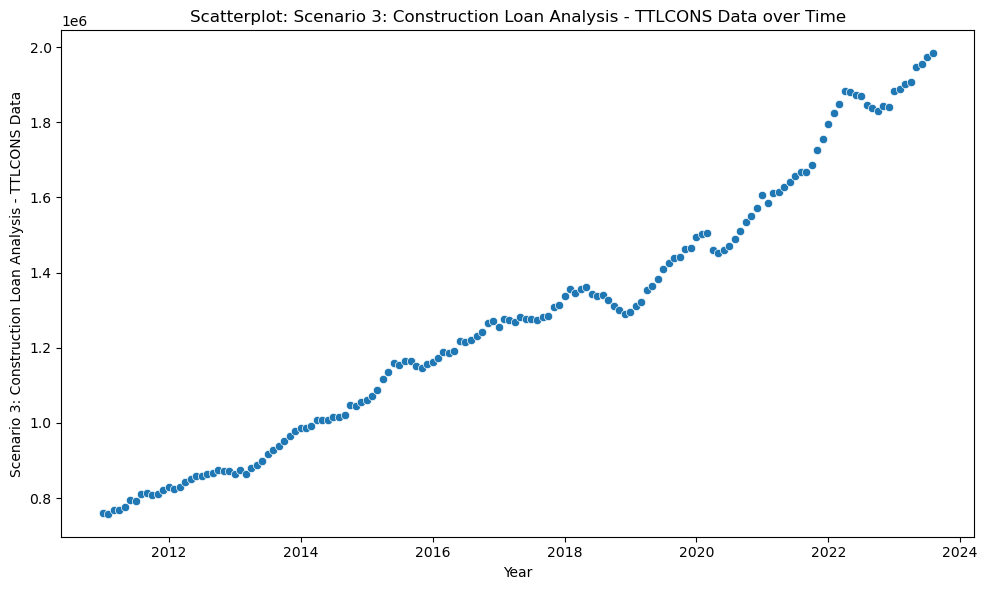

In [33]:
# Scenario 3: Construction Loan Analysis
analyze_scenario_data(scenario_name='Scenario 3: Construction Loan Analysis', fred_codes=['TTLCONS'])
# The time series plot reveals an intriguing relationship between mortgage interest rates and the All-Transactions House Price Index.

In [34]:
def analyze_scenario_yahoo_finance(stock_symbol):
    """
    Perform Exploratory Data Analysis (EDA) for Scenario 4: Publicly Traded Equity (Securities Lending of a Stock).
    
    Args:
        stock_symbol (str): The symbol of the publicly traded equity (e.g., AAPL for Apple).
    """
    # Define the date range for historical data (from January 1, 2011, to the present date)
    start_date = datetime.date(2011, 1, 1)
    end_date = datetime.date.today()  # Use today's date as the end date

    # Fetch historical data using yfinance
    stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

    # Calculate daily returns
    stock_data['Returns'] = stock_data['Close'].pct_change() * 100

    # Create a table of stock price, volume traded, and returns
    table_data = stock_data[['Close', 'Volume', 'Returns']].copy()
    table_data.rename(columns={'Close': 'Closing Price', 'Volume': 'Volume Traded', 'Returns': 'Returns (%)'}, inplace=True)

    # Display the table
    print(f"Table of {stock_symbol} Historical Data:")
    print(table_data)

    # Create Time Series Plot
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data.index, stock_data['Close'], label=f"{stock_symbol} Close Price", color='blue')
    plt.xlabel("Date")
    plt.ylabel("Closing Price (USD)")
    plt.title(f"{stock_symbol} Stock Price Over Time")
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

    # Create Distribution Plot
    plt.figure(figsize=(12, 6))
    plt.hist(stock_data['Close'], bins=50, color='green', alpha=0.7)
    plt.xlabel("Closing Price (USD)")
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {stock_symbol} Closing Prices")
    plt.grid(True)
    plt.show()
    
    # Plot Returns Over the Years
    plt.figure(figsize=(12, 6))
    plt.bar(stock_data.index, stock_data['Returns'], label=f"{stock_symbol} Returns", color='purple')
    plt.xlabel("Date")
    plt.ylabel("Returns (%)")
    plt.title(f"{stock_symbol} Returns Over Time")
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

    # Create Scatter Plot to Show Effect of Price on Volume Traded Over Time
    plt.figure(figsize=(12, 6))
    plt.scatter(stock_data['Close'], stock_data['Volume'], c=stock_data['Returns'], cmap='viridis', s=30)
    plt.colorbar(label='Returns (%)')
    plt.xlabel("Closing Price (USD)")
    plt.ylabel("Volume Traded")
    plt.title(f"Effect of Price on Volume Traded for {stock_symbol}")
    plt.grid(True)
    plt.show()




[*********************100%%**********************]  1 of 1 completed
Table of NFLX Historical Data:
            Closing Price  Volume Traded  Returns (%)
Date                                                 
2011-01-03      25.487143       39956000          NaN
2011-01-04      25.910000       44065700     1.659100
2011-01-05      25.675714       31799600    -0.904228
2011-01-06      25.427143       31991400    -0.968119
2011-01-07      25.614286       22155000     0.735998
...                   ...            ...          ...
2023-10-02     380.329987        3102100     0.722982
2023-10-03     376.750000        8878100    -0.941284
2023-10-04     376.899994        4303700     0.039813
2023-10-05     372.589996        5034800    -1.143539
2023-10-06     381.510010        4773400     2.394056

[3212 rows x 3 columns]


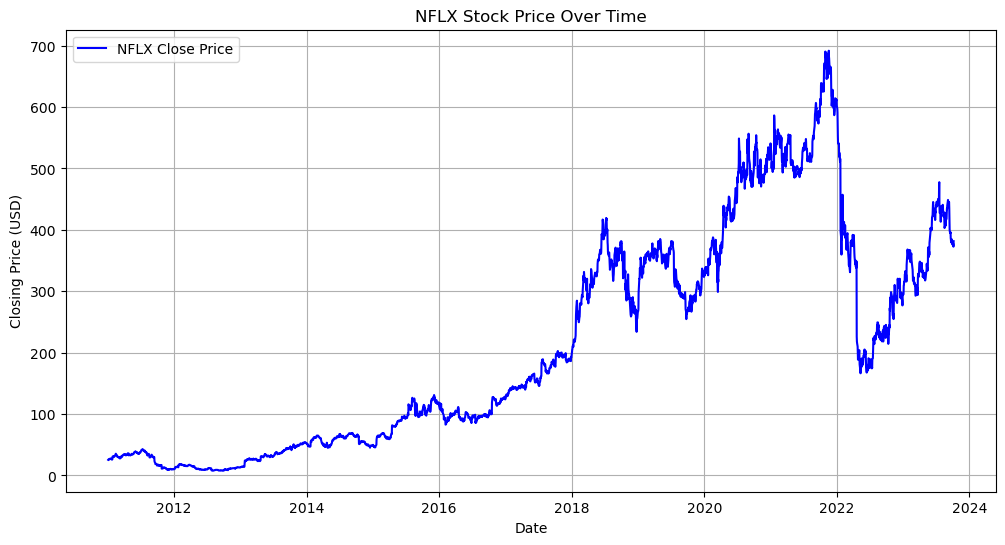

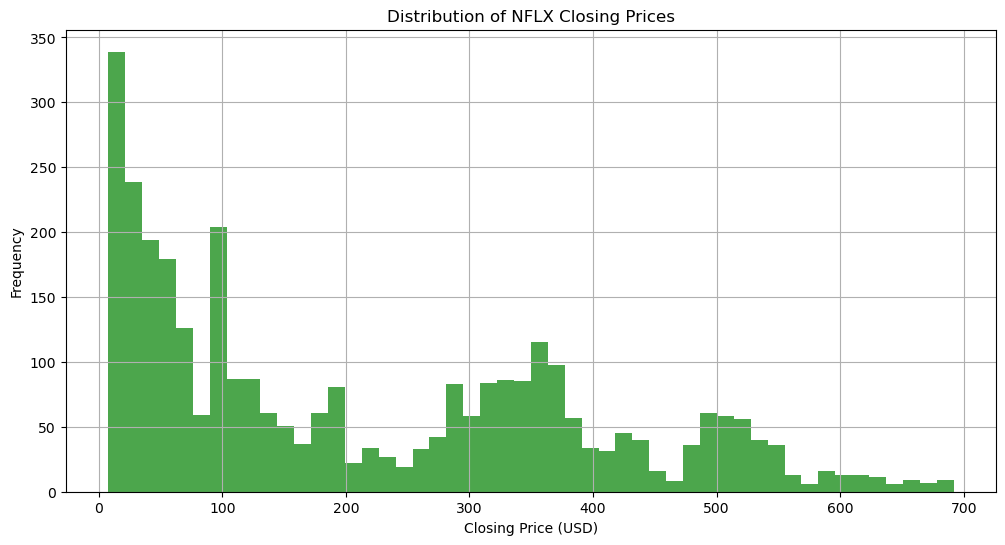

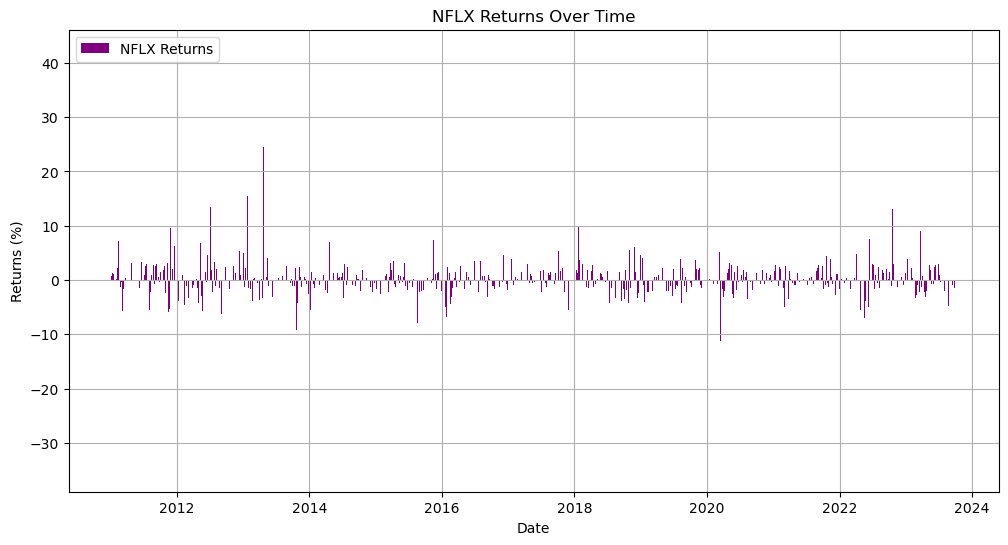

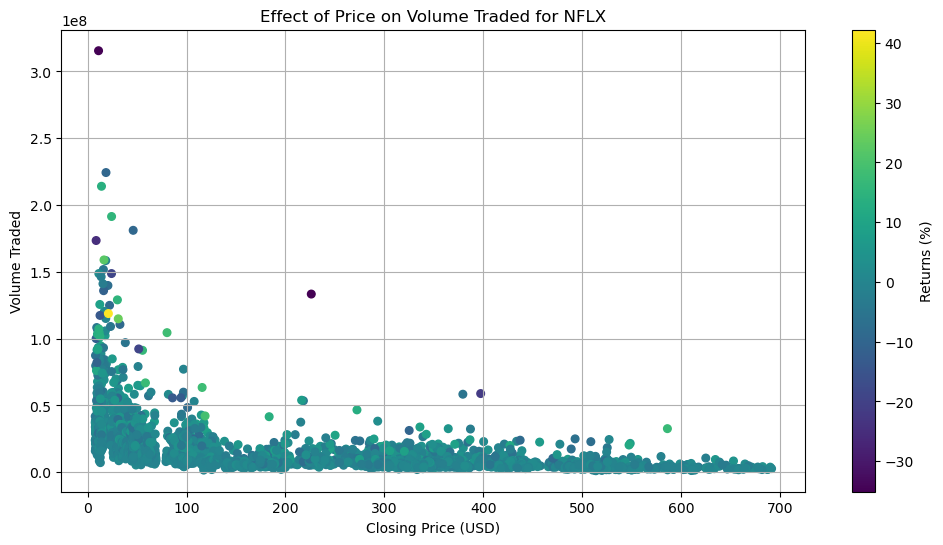

In [35]:
# SCENARIO 4

analyze_scenario_yahoo_finance("NFLX")
# - The time series plot shows the historical stock price of Netflix (NFLX) from 2011 to the present.
# - The distribution plot illustrates the distribution of closing prices, indicating the spread and frequency of price values.

[*********************100%%**********************]  1 of 1 completed
Table of AGG Historical Data:
            Closing Price  Volume Traded  Returns (%)
Date                                                 
2011-01-03     105.629997         739700          NaN
2011-01-04     105.660004         625500     0.028407
2011-01-05     105.150002         864200    -0.482682
2011-01-06     105.169998        2032600     0.019017
2011-01-07     105.510002         968500     0.323290
...                   ...            ...          ...
2023-10-02      93.129997        8880000    -0.967677
2023-10-03      92.400002       12058400    -0.783846
2023-10-04      93.050003       14097800     0.703465
2023-10-05      93.110001        7129400     0.064479
2023-10-06      92.750000        9569500    -0.386640

[3212 rows x 3 columns]


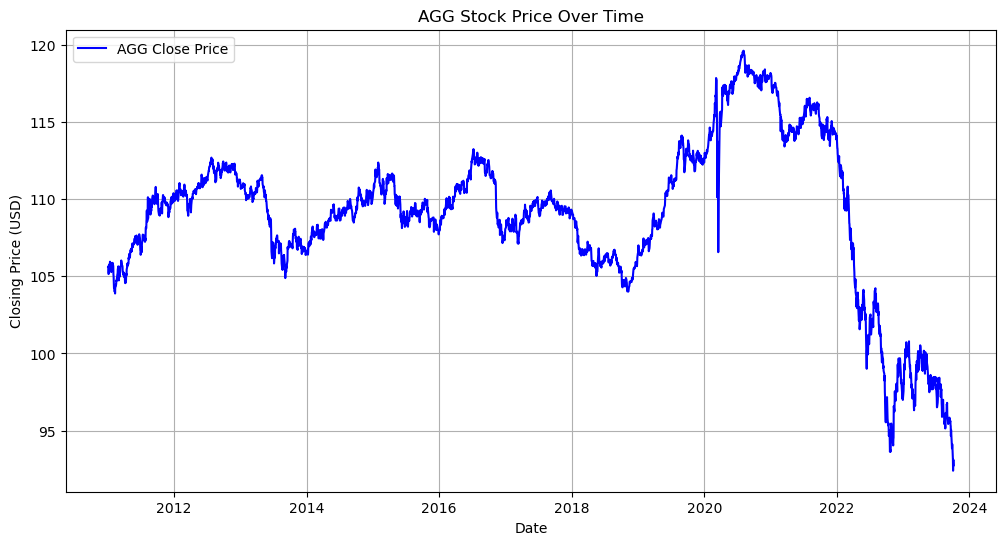

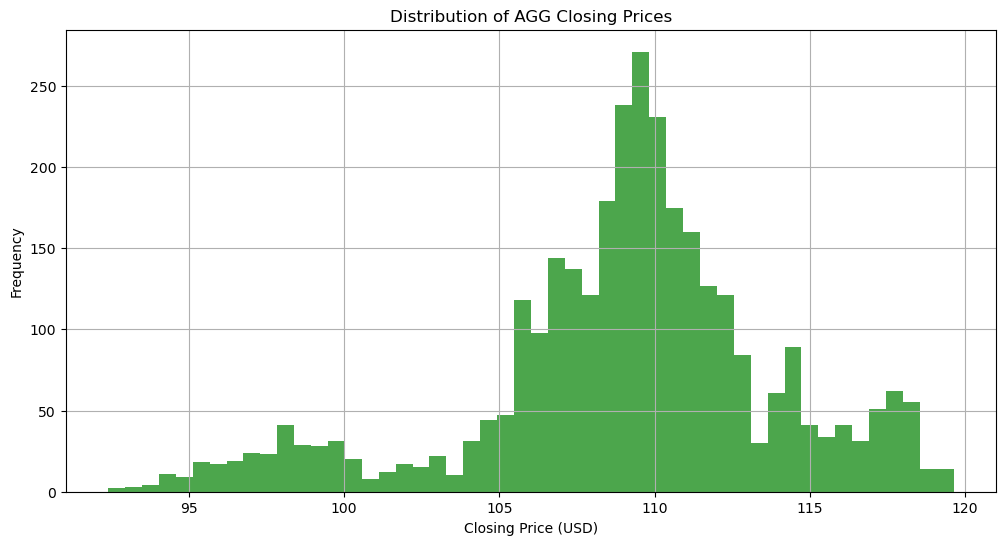

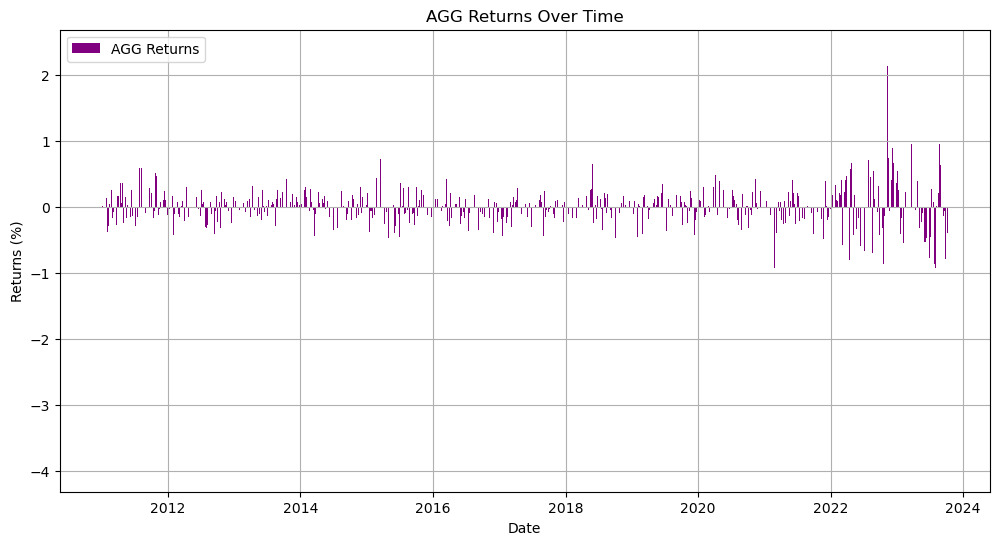

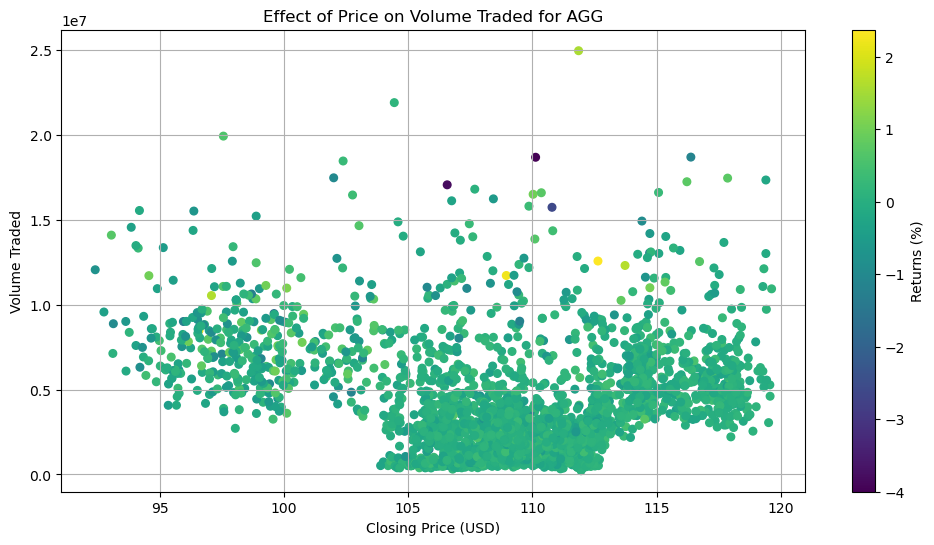

In [36]:
# Scenario 5

# Specify the bond symbol "AGG" for iShares Core U.S. Aggregate Bond ETF

analyze_scenario_yahoo_finance("AGG")